In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as  sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LS
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
rocket=pd.read_csv("C:/Users/LENOVO/Downloads/Flight  - Sheet1.csv")

In [3]:
rocket.head()
rocket.describe()


,Length,Breadth,Foldings,Distance
count,71.000000,88.000000,88.000000,88.000000
mean,26.708451,18.500000,8.136364,6.090909
std,11.920268,1.339068,1.736570,1.974762
min,0.000000,16.000000,5.000000,1.000000
25%,22.500000,17.500000,8.000000,5.000000
50%,28.500000,18.500000,8.000000,6.000000
75%,29.500000,20.000000,10.000000,7.000000
max,98.000000,20.500000,10.000000,11.000000


In [4]:
 rocket.shape


(88, 10)

In [5]:
rocket.dtypes


Person              object
Item_Identifier     object
Length             float64
Breadth            float64
PaperQuality        object
Angle               object
Foldings             int64
Windspeed           object
Dominanthand        object
Distance             int64
dtype: object

In [6]:
rocket.isnull().sum()


Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Person', ylabel='count'>

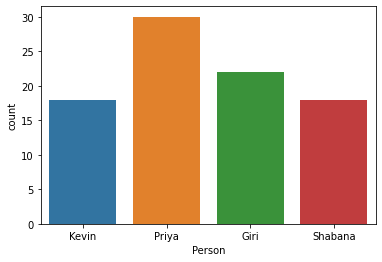

In [7]:

sns.countplot(rocket.Person)


In [8]:
rocket.Person.value_counts()


Priya      30
Giri       22
Kevin      18
Shabana    18
Name: Person, dtype: int64

In [9]:
(rocket.Length.isnull().mean())*100


19.318181818181817

In [10]:
rocket.Length.fillna(rocket.Length.mean(),inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x234632a7610>,
 'caps': [<matplotlib.lines.Line2D at 0x234632a7c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x234632a72e0>],
 'medians': [<matplotlib.lines.Line2D at 0x234632b63d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x234632b6760>],
 'means': []}

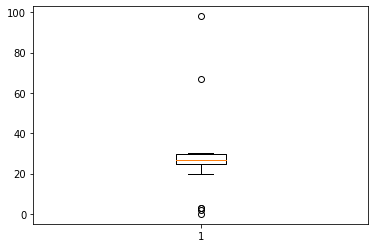

In [11]:
plt.boxplot(rocket.Length)


In [12]:
rocket.Breadth.isnull().sum()


0

{'whiskers': [<matplotlib.lines.Line2D at 0x23467973a30>,
 'caps': [<matplotlib.lines.Line2D at 0x23467981190>,
 'boxes': [<matplotlib.lines.Line2D at 0x234679736a0>],
 'medians': [<matplotlib.lines.Line2D at 0x234679818b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23467981c40>],
 'means': []}

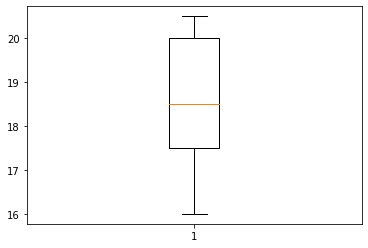

In [13]:
plt.boxplot(rocket.Breadth)


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Breadth', ylabel='count'>

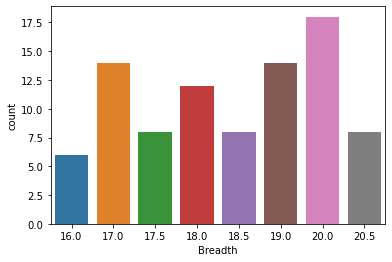

In [14]:
sns.countplot(rocket.Breadth)


In [15]:
rocket.PaperQuality.isnull().sum()


8

In [16]:
rocket.PaperQuality.fillna("Others",inplace=True)


In [17]:
rocket.PaperQuality.value_counts()


B         47
A         33
Others     8
Name: PaperQuality, dtype: int64

In [18]:
rocket.PaperQuality.fillna("Others",inplace=True)


In [19]:
rocket.PaperQuality.value_counts()


B         47
A         33
Others     8
Name: PaperQuality, dtype: int64

In [20]:
rocket.Angle.isnull().sum()

4

In [21]:
rocket.Angle.value_counts()


U    62
L    22
Name: Angle, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle', ylabel='count'>

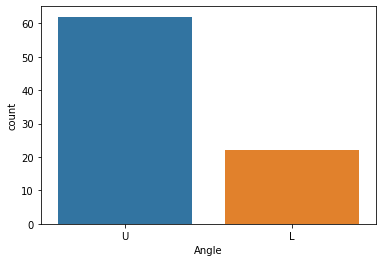

In [22]:
 sns.countplot(rocket.Angle)


In [23]:
rocket.Foldings.isnull().sum()


0

In [24]:
rocket.Foldings.value_counts()


8     42
10    30
5     16
Name: Foldings, dtype: int64

In [25]:
rocket.Foldings.replace([5,8,10],['five','eight','ten'],inplace=True)


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Foldings', ylabel='count'>

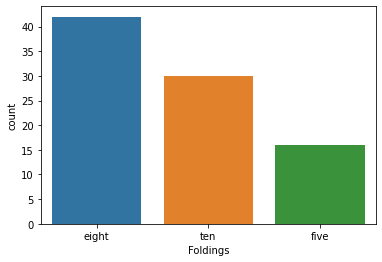

In [26]:
sns.countplot(rocket.Foldings)


In [27]:
rocket.Dominanthand.isnull().sum()
 

0

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dominanthand', ylabel='count'>

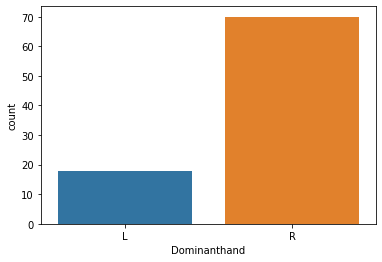

In [28]:
sns.countplot(rocket.Dominanthand)


In [29]:
rocket.Distance.isnull().sum()


0

{'whiskers': [<matplotlib.lines.Line2D at 0x23468b596d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23468b59df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23468b59340>],
 'medians': [<matplotlib.lines.Line2D at 0x23468b68550>],
 'fliers': [<matplotlib.lines.Line2D at 0x23468b688e0>],
 'means': []}

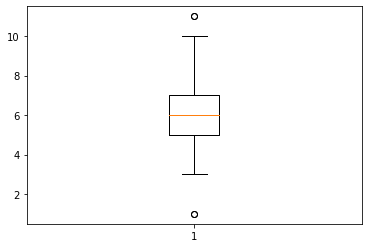

In [30]:
plt.boxplot(rocket.Distance)


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='count'>

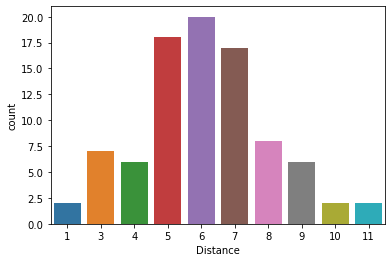

In [31]:
sns.countplot(rocket.Distance)


In [32]:
from scipy import stats 
import statsmodels.api as sm


In [33]:
per1=rocket.Distance[rocket.Person=="Priya"]
per2=rocket.Distance[rocket.Person=="Girl"]
per3=rocket.Distance[rocket.Person=="Kevin"]
per4=rocket.Distance[rocket.Person=="shabana"]
stats.f_oneway(per1,per2,per3,per4)


C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [34]:

per1=rocket.Distance[rocket.PaperQuality=="A"]
per2=rocket.Distance[rocket.PaperQuality=="B"]
per3=rocket.Distance[rocket.PaperQuality=="others"]
stats.f_oneway(per1,per2,per3)

F_onewayResult(statistic=nan, pvalue=nan)

In [35]:

per1=rocket.Distance[rocket.Angle=="U"]
per2=rocket.Distance[rocket.Angle=="L"]
stats.f_oneway(per1,per2)


F_onewayResult(statistic=0.039320755437030244, pvalue=0.8433053540143658)

In [36]:
per1=rocket.Distance[rocket.Dominanthand=="R"]
per2=rocket.Distance[rocket.Dominanthand=="L"]
stats.f_oneway(per1,per2)


F_onewayResult(statistic=0.5123419286713021, pvalue=0.47606580733526194)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression as LS


In [38]:
strength=stats.pearsonr(rocket.Length,rocket.Distance)
print(strength)


(0.04169302061327826, 0.6997257388750459)


In [39]:
strength=stats.pearsonr(rocket.Breadth,rocket.Distance)
print(strength)


(-0.1130151260715652, 0.29446338462214466)


In [40]:
 rocket.drop('Item_Identifier',axis=1,inplace=True)


In [41]:
rocket.columns


Index(['Person', 'Length', 'Breadth', 'PaperQuality', 'Angle', 'Foldings',
       'Windspeed ', 'Dominanthand', 'Distance'],
      dtype='object')

In [42]:
dummy_var=pd.get_dummies(rocket)


In [43]:
dummy_var.columns
   

Index(['Length', 'Breadth', 'Distance', 'Person_Giri', 'Person_Kevin',
       'Person_Priya', 'Person_Shabana', 'PaperQuality_A', 'PaperQuality_B',
       'PaperQuality_Others', 'Angle_L', 'Angle_U', 'Foldings_eight',
       'Foldings_five', 'Foldings_ten', 'Windspeed _Off', 'Windspeed _On',
       'Dominanthand_L', 'Dominanthand_R'],
      dtype='object')

In [44]:
scaler=MinMaxScaler()

In [45]:
 scaler_data=scaler.fit(dummy_var)


In [46]:
scaler_data=scaler.transform(dummy_var)


In [47]:
 scaler_data=pd.DataFrame(scaler_data)


In [48]:
 scaler_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.295918,0.888889,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.234694,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.272535,0.444444,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.275510,0.888889,0.3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.301020,0.333333,0.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [49]:
 y=dummy_var.Distance


In [50]:
 x=dummy_var.drop('Distance',axis=1)


In [51]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)


<h1>Logistic regression<h2>


In [52]:
 model=LR(random_state=0).fit(train_x,train_y)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
predicted_y=model.predict(test_x)


In [54]:
probability_y=model.predict_proba(test_x)
model.score(test_x,test_y)


0.16666666666666666

 <h1>Decision tree<h1>


In [55]:
model_tree=DecisionTreeClassifier().fit(train_x,train_y)  
model_tree.score(test_x,test_y)


0.16666666666666666

In [57]:
 model1=LS().fit(train_x,train_y)


In [58]:
model1.score(train_x,train_y)


0.17588909313180134

In [59]:
model1.score(x,y)


0.11481098490874164

<h1> Random forest bagging algorithm <h1>


In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(train_x,train_y)


RandomForestRegressor(n_estimators=10, random_state=0)

In [61]:
 y_pred=regressor.predict(test_x)


In [62]:
regressor.score(train_x,train_y)


0.2782927095878428

In [63]:
regressor.score(test_x,test_y)


-0.6196762959866224

<h1>Gradient Boosting<h1>

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
regres = GradientBoostingRegressor(n_estimators=100,random_state=0)
regres.fit(train_x,train_y)


GradientBoostingRegressor(random_state=0)

In [65]:
y_pred=regres.predict(test_x)


In [66]:
regres.score(train_x,train_y)


0.35378613131545444

In [67]:
regres.score(test_x,test_y)


-0.8410540647884794

<h1>AdaBoostRegressor</h2>

In [72]:
model=AdaBoostRegressor(n_estimators=100).fit(train_x,train_y)
model.score(test_x,test_y)
y_pred=model.predict(test_x)
rmse=mean_squared_error(test_y,y_pred,squared=False)
print(rmse)

2.2202051054291845
